In [73]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [30]:
df_insurance_claims = pd.read_csv("D:/Postgraduate_studies_BA/Term_2/Applied_Deep_Learning/Week5/Insurance_claims.csv")

# Model 1

## The Simple model based on the incident occurs within t days of the subscription date.

In [31]:
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [32]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

In [33]:
df_insurance_claims_t_days = df_insurance_claims[["LossDate", "FirstPolicySubscriptionDate", "Fraud"]]
df_insurance_claims_t_days

,LossDate,FirstPolicySubscriptionDate,Fraud
0,1/2/19,6/18/18,0
1,1/2/19,6/29/17,0
2,1/2/19,2/5/17,0
3,1/2/19,1/21/17,0
4,1/2/19,1/13/18,0
...,...,...,...
11525,2/17/21,3/15/19,0
11526,3/7/21,7/20/17,0
11527,3/15/21,9/30/20,0
11528,3/6/21,12/28/18,0


In [34]:
df_insurance_claims_t_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   LossDate                     11530 non-null  object
 1   FirstPolicySubscriptionDate  11530 non-null  object
 2   Fraud                        11530 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 270.4+ KB


In [35]:
df_insurance_claims_t_days["LossDate"] = pd.to_datetime(df_insurance_claims_t_days["LossDate"])
df_insurance_claims_t_days["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_t_days["FirstPolicySubscriptionDate"])

C:\Users\98179\AppData\Local\Temp\ipykernel_18172\4032360195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["LossDate"] = pd.to_datetime(df_insurance_claims_t_days["LossDate"])
C:\Users\98179\AppData\Local\Temp\ipykernel_18172\4032360195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_t_days["FirstPolicySubscriptionDate"])


In [36]:
df_insurance_claims_t_days

,LossDate,FirstPolicySubscriptionDate,Fraud
0,2019-01-02,2018-06-18,0
1,2019-01-02,2017-06-29,0
2,2019-01-02,2017-02-05,0
3,2019-01-02,2017-01-21,0
4,2019-01-02,2018-01-13,0
...,...,...,...
11525,2021-02-17,2019-03-15,0
11526,2021-03-07,2017-07-20,0
11527,2021-03-15,2020-09-30,0
11528,2021-03-06,2018-12-28,0


In [37]:
df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')

C:\Users\98179\AppData\Local\Temp\ipykernel_18172\1524189945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
C:\Users\98179\AppData\Local\Temp\ipykernel_18172\1524189945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')


In [38]:
df_insurance_claims_t_days = df_insurance_claims_t_days.astype({"Days": "int64"})

In [39]:
df_insurance_claims_t_days

,LossDate,FirstPolicySubscriptionDate,Fraud,Days
0,2019-01-02,2018-06-18,0,198
1,2019-01-02,2017-06-29,0,552
2,2019-01-02,2017-02-05,0,696
3,2019-01-02,2017-01-21,0,711
4,2019-01-02,2018-01-13,0,354
...,...,...,...,...
11525,2021-02-17,2019-03-15,0,705
11526,2021-03-07,2017-07-20,0,1326
11527,2021-03-15,2020-09-30,0,166
11528,2021-03-06,2018-12-28,0,799


In [40]:
df_insurance_claims_t_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LossDate                     11530 non-null  datetime64[ns]
 1   FirstPolicySubscriptionDate  11530 non-null  datetime64[ns]
 2   Fraud                        11530 non-null  int64         
 3   Days                         11530 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 360.4 KB


In [41]:
df_fraud = df_insurance_claims_t_days.loc[df_insurance_claims_t_days["Fraud"] == 1]

In [42]:
df_fraud[99:120]

,LossDate,FirstPolicySubscriptionDate,Fraud,Days
8178,2020-07-07,2020-06-19,1,18
8422,2020-05-30,2020-05-25,1,5
8546,2020-07-24,2017-04-10,1,1201
8621,2020-06-25,2020-06-01,1,24
8684,2020-08-03,2020-07-27,1,7
8711,2020-08-06,2020-07-23,1,14
8721,2020-08-03,2019-03-18,1,504
8730,2020-08-08,2018-07-22,1,748
8824,2020-08-13,2020-08-07,1,6
9106,2020-08-29,2020-08-21,1,8


In [43]:
df_fraud["Days"].max()

1201

In [44]:
df_fraud["Days"].min()

0

In [45]:
t = range(1202)

In [46]:
def detect_fraud_model_1(t, df_insurance_claims_t_days):
    d = []
    h = []
    for i in t:
        #y_hat = []
        a = 0
        b = 0
        for o in range(len(df_insurance_claims_t_days)):
            if df_insurance_claims_t_days["Days"][o] <= i:
                #y = 1
                #y_hat.append(y)
                a = a + 1
                if df_insurance_claims_t_days["Fraud"][o] == 1:
                    b = b + 1
            else:
                #y = 0
                #y_hat.append(y)
                pass
        
        detection_rate = round((a / len(df_insurance_claims_t_days))*100, 2)
        d.append(detection_rate)
        hit_rate = round((b / a)*100, 2)
        h.append(hit_rate)
    
    return d, h

In [47]:
d, h = detect_fraud_model_1(t, df_insurance_claims_t_days)

## Plot the result

Text(0, 0.5, 'Hint Rate')

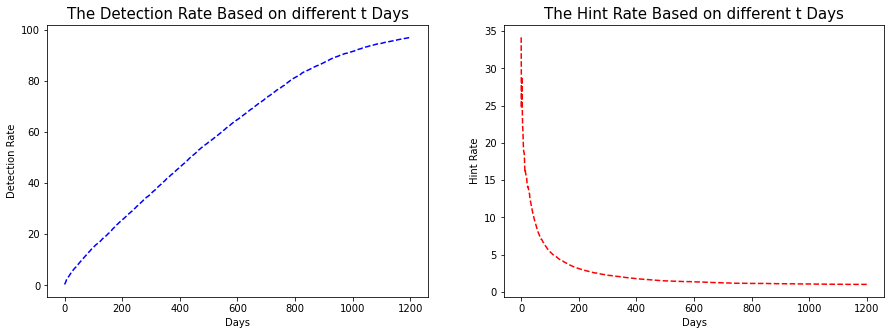

In [48]:
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,2,1)
AX2 = fig.add_subplot(1,2,2)

AX1.plot(t, d, ls = "--", color = "blue")
AX2.plot(t, h, ls = "--", color = "red")

AX1.set_title("The Detection Rate Based on different t Days", fontsize = 15, horizontalalignment="center")
AX2.set_title("The Hint Rate Based on different t Days", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("Days", fontsize = 10)
AX1.set_ylabel("Detection Rate", fontsize = 10)

AX2.set_xlabel("Days", fontsize = 10)
AX2.set_ylabel("Hint Rate", fontsize = 10)

# Model 2: Decision Tree

### Pre-processing the dataset

In [49]:
df_insurance_claims

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,NaN,NaN,Employee,2/17/21,3/15/19,WindscreenDamage,Windscreen,...,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0
11526,16379,581104,788178.0,NaN,NaN,Employee,3/7/21,7/20/17,WindscreenDamage,Windscreen,...,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0
11527,16380,817231,NaN,NaN,NaN,Employee,3/15/21,9/30/20,WindscreenDamage,Windscreen,...,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0
11528,16381,321534,468522.0,NaN,NaN,CivilServant,3/6/21,12/28/18,WindscreenDamage,Windscreen,...,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0


In [50]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

In [51]:
df_insurance_claims.nunique()

ReferenceId                        11530
PolicyholderNumber                  9404
FirstPartyVehicleNumber             9431
ThirdPartyVehicleNumber              350
InsurerNotes                        9040
PolicyholderOccupation                11
LossDate                             804
FirstPolicySubscriptionDate         1389
ClaimCause                            18
ClaimInvolvedCovers                   68
DamageImportance                       2
FirstPartyVehicleType                  4
ConnectionBetweenParties               5
LossPostCode                        3004
PolicyHolderPostCode                3130
PolicyWasSubscribedOnInternet          2
NumberOfPoliciesOfPolicyholder        17
FpVehicleAgeMonths                   388
EasinessToStage                        4
ClaimWihoutIdentifiedThirdParty        2
ClaimAmount                         8248
LossHour                              24
PolicyHolderAge                       73
NumberOfBodilyInjuries                 6
FirstPartyLiabil

In [52]:
df_insurance_claims_clean = df_insurance_claims.drop(columns = ["ReferenceId", 
                                                                "PolicyholderNumber", 
                                                                "FirstPartyVehicleNumber",
                                                                "ThirdPartyVehicleNumber",
                                                                "InsurerNotes",
                                                                "DamageImportance",
                                                                "ConnectionBetweenParties",
                                                                "LossPostCode",
                                                                "PolicyHolderPostCode",
                                                                "LossDate",
                                                                "FirstPolicySubscriptionDate"])

In [53]:
df_insurance_claims_clean = df_insurance_claims_clean[(df_insurance_claims_clean.PolicyholderOccupation.notnull()) &
                                                      (df_insurance_claims_clean.ClaimCause.notnull()) &
                                                      (df_insurance_claims_clean.ClaimInvolvedCovers.notnull()) &
                                                      (df_insurance_claims_clean.FirstPartyVehicleType.notnull()) &
                                                      (df_insurance_claims_clean.FpVehicleAgeMonths.notnull()) &
                                                      (df_insurance_claims_clean.LossHour.notnull())].reset_index()

In [55]:
#df_insurance_claims_clean["LossDate"] = pd.to_datetime(df_insurance_claims_clean["LossDate"])
#df_insurance_claims_clean["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_clean["FirstPolicySubscriptionDate"])

In [56]:
df_insurance_claims_clean = df_insurance_claims_clean.drop(columns = ["index"])
df_insurance_claims_clean 

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,Worker,LossOfControl,MaterialDamages ActLiability,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,Employee,WindscreenDamage,Windscreen,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0
10890,Employee,WindscreenDamage,Windscreen,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0
10891,Employee,WindscreenDamage,Windscreen,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0
10892,CivilServant,WindscreenDamage,Windscreen,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0


In [57]:
df_insurance_claims_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10894 entries, 0 to 10893
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PolicyholderOccupation           10894 non-null  object 
 1   ClaimCause                       10894 non-null  object 
 2   ClaimInvolvedCovers              10894 non-null  object 
 3   FirstPartyVehicleType            10894 non-null  object 
 4   PolicyWasSubscribedOnInternet    10894 non-null  int64  
 5   NumberOfPoliciesOfPolicyholder   10894 non-null  int64  
 6   FpVehicleAgeMonths               10894 non-null  float64
 7   EasinessToStage                  10894 non-null  float64
 8   ClaimWihoutIdentifiedThirdParty  10894 non-null  int64  
 9   ClaimAmount                      10894 non-null  float64
 10  LossHour                         10894 non-null  float64
 11  PolicyHolderAge                  10894 non-null  float64
 12  NumberOfBodilyInju

In [58]:
df_insurance_claims_clean = pd.get_dummies(df_insurance_claims_clean , drop_first=True, columns=["PolicyholderOccupation","ClaimCause","ClaimInvolvedCovers","FirstPartyVehicleType"])
df_insurance_claims_clean

,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,...,ClaimInvolvedCovers_Windscreen ActLiability NaturalCatastrophes,ClaimInvolvedCovers_Windscreen ActLiability Theft,ClaimInvolvedCovers_Windscreen ActLiability Theft ReplacementVehicle,ClaimInvolvedCovers_Windscreen MaterialDamages,ClaimInvolvedCovers_Windscreen MaterialDamages ActLiability,ClaimInvolvedCovers_Windscreen NaturalCatastrophes,ClaimInvolvedCovers_Windscreen Theft,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar
0,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,...,0,0,0,0,0,0,0,0,0,0
3,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,...,0,0,0,0,0,0,0,0,0,0
4,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
10890,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
10891,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
10892,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_insurance_claims_clean.to_csv("aa.csv")

In [59]:
df_insurance_claims_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10894 entries, 0 to 10893
Columns: 106 entries, PolicyWasSubscribedOnInternet to FirstPartyVehicleType_PrivateCar
dtypes: float64(6), int64(5), uint8(95)
memory usage: 1.9 MB


In [61]:
df_insurance_claims_clean.head()

,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,...,ClaimInvolvedCovers_Windscreen ActLiability NaturalCatastrophes,ClaimInvolvedCovers_Windscreen ActLiability Theft,ClaimInvolvedCovers_Windscreen ActLiability Theft ReplacementVehicle,ClaimInvolvedCovers_Windscreen MaterialDamages,ClaimInvolvedCovers_Windscreen MaterialDamages ActLiability,ClaimInvolvedCovers_Windscreen NaturalCatastrophes,ClaimInvolvedCovers_Windscreen Theft,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar
0,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,...,0,0,0,0,0,0,0,0,0,0
3,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,...,0,0,0,0,0,0,0,0,0,0
4,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
test_data = df_insurance_claims_clean["Fraud"]


In [65]:
train_date = df_insurance_claims_clean.drop(columns = ["Fraud"])

In [140]:
X = train_date
y = test_data

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [142]:
decision_tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 120)#max_depth=3, min_samples_split=2, splitter='best', 

In [143]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=120)

In [144]:
y_predict = decision_tree_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
print("Accuracy is ", accuracy_score(y_test, y_predict)*100)

Accuracy is  97.88893988067922


In [146]:
len(y_predict)

2179

In [147]:
len(y_test)

2179

In [148]:
a = 0
b = 0
for i, o in zip(y_test, y_predict):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

Decision_Tree_d = round((a / len(y_predict))*100, 2)
Decision_Tree_h = round((b / a)*100, 2)
        

In [149]:
Decision_Tree_d

1.15

In [150]:
Decision_Tree_h

12.0

In [83]:
df_result = pd.DataFrame({"y_hat": y_predict,
                          "y": y_test})

In [84]:
df_result.to_csv("result.csv")

## Model 3 Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
test_data = df_insurance_claims_clean["Fraud"]
train_date = df_insurance_claims_clean.drop(columns = ["Fraud"])

In [193]:
X = train_date
y = test_data

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=120)

In [195]:
random_forest_model = RandomForestClassifier(criterion = "entropy", max_features = "auto", random_state = 120)

In [196]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=120)

In [197]:
y_predict = random_forest_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [198]:
a = 0
b = 0
for i, o in zip(y_test, y_predict):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

Decision_Tree_d = round((a / len(y_predict))*100, 2)
Decision_Tree_h = round((b / a)*100, 2)
        

In [199]:
Decision_Tree_d

0.03

In [200]:
Decision_Tree_h

0.0